# Lesson 1b: Basic Neural Network with Keras

In this lesson you will build a small neural network in Keras and train it to replicate the logical XOR function.

## Imports

In [1]:
%matplotlib inline
from IPython.display import SVG

from keras.models import Model, Sequential
from keras.layers import Input, Dense
from keras.regularizers import l2
from keras.utils.vis_utils import model_to_dot
import math
import numpy as np

import matplotlib.pyplot as plt

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Create dataset for the logical XOR function

In [2]:
data_X = np.array([[0, 0],
                   [1, 0],
                   [0, 1],
                   [1, 1]])
data_y = np.array([0, 
                   1, 
                   1, 
                   0])

## Build the neural net model

In [3]:
model = Sequential()
model.add(Dense(2, input_shape=(2,), activation='sigmoid', kernel_initializer='glorot_normal', 
                kernel_regularizer=l2(0.0001)))

In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 6         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


# Question 1: 
How many parameters are there in the model so far? Why? Explain in detail what each parameter represents. Answer in the cell below. 

6 parameters. There are 2 input nodes, connected to 2 hidden nodes. This gives 2x2 = 4 weights. This accounts for 4 of the parameters.

The other 2 parameters are the bias terms: one bias weight for each of the two hidden nodes.

## Add another layer

In [5]:
model.add(Dense(1, activation='sigmoid', kernel_initializer='glorot_normal'))

In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


## Question 2: 
How many new parameters are there now (e.g., how many were added after question 1)? Why? What does each new parameter represent? 

There are 3 new parameters (for a total of 9). The new layer contains a single node, so each of the 2 previous hidden-layer nodes are connected to this single new node. That gives 2 regular weights. In addition, the new single node has a single bias node, connected to it with 1 weight. Hence there are 3 new weights in the network.

## Visualize the model

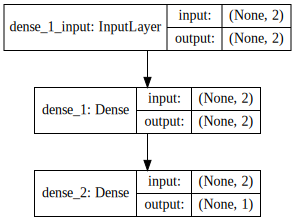

In [7]:
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

## Train the model

In [14]:
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

### Modify the steps per epoch, number of epochs, etc. below as needed. The goal should be 100% accuracy for the XOR data.

In [15]:
model.fit(data_X, data_y,
          steps_per_epoch=500,
          epochs=50)   # Note: different random initial conditions require different # of epochs. The output results in acc 1.000

Epoch 1/50
500/500 [==============================] - 2s 4ms/step - loss: 0.0579 - acc: 1.0000
Epoch 2/50
500/500 [==============================] - 2s 4ms/step - loss: 0.0428 - acc: 1.0000
Epoch 3/50
500/500 [==============================] - 2s 4ms/step - loss: 0.0337 - acc: 1.0000
Epoch 4/50
500/500 [==============================] - 2s 4ms/step - loss: 0.0280 - acc: 1.0000
Epoch 5/50
500/500 [==============================] - 2s 4ms/step - loss: 0.0241 - acc: 1.0000
Epoch 6/50
500/500 [==============================] - 2s 4ms/step - loss: 0.0213 - acc: 1.0000
Epoch 7/50
500/500 [==============================] - 2s 4ms/step - loss: 0.0192 - acc: 1.0000
Epoch 8/50
500/500 [==============================] - 2s 4ms/step - loss: 0.0174 - acc: 1.0000
Epoch 9/50
500/500 [==============================] - 2s 4ms/step - loss: 0.0159 - acc: 1.0000
Epoch 10/50
500/500 [==============================] - 2s 4ms/step - loss: 0.0146 - acc: 1.0000
Epoch 11/50
500/500 [============================

# Run the trained model on the dataset.

In [16]:
model.predict(data_X)

array([[0.01927716],
       [0.9816027 ],
       [0.97984916],
       [0.0192737 ]], dtype=float32)

# Question 3:
Explain the results of the predict() call above. How well did the trained model do on this problem?

The model is close to the desire results given in data_y (see following cell). The results are not exact because we have a sigmoid activation and will never output exactly 1 or 0. But if we consider a threshold of 0.5, setting the output to 1 if above threshold and 0 otherwise, then indeed the output is exactly [0,1,1,0] for the 4 inputs, as expected. Thus the network has solved the XOR problem.

In [17]:
data_y

array([0, 1, 1, 0])

# Question 4:
Print the weights of both layers of the trained network below. HINT: model.layers gives a list of layers. layer.get_weights() returns layer weights.

In [18]:
model.layers[0].get_weights()

[array([[ 2.2040293,  2.299044 ],
        [-2.204053 , -2.2990038]], dtype=float32),
 array([-1.8283949,  1.6810341], dtype=float32)]

In [13]:
model.layers[1].get_weights()

[array([[ 4.1103945],
        [-2.8755395]], dtype=float32), array([1.1005371], dtype=float32)]